In [69]:
import pandas as pd
import numpy as np

In [70]:
fifa = pd.read_csv("c:\\Users\\Suhaib\\Desktop\\cpsc573project\\FIFA22_official_data.csv")
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

Questions :
1. Age and potential
    - how it impact on value (?)
2. What traits of attackers, defenders, midfielders and GK make them the most valuable in their         respective position?
    (change specific positions to attack, defence, mid and GK) --(clustering)
3. Which players had the highest increase / decrease in value over the 6 years? Is age a big factor in decrease in value?
4. Which country produces the best players (based on rating and value)
5. Which position makes the most wages ?
6. Who are expected to be the highest rated players in the next version FIFA?



First lets drop all the columns we dont need 

In [71]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [72]:
columns_to_drop = ['ID', 'Photo', 'Flag', 'Club Logo', 'Special', 'International Reputation', 
                   'Work Rate', 'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From',
                    'Contract Valid Until', 'Release Clause', 'Best Overall Rating']

# Check if the columns exist in the DataFrame before dropping them
columns_exist = all(col in fifa.columns for col in columns_to_drop)

if columns_exist:
    fifa = fifa.drop(columns=columns_to_drop)
else:
    print("One or more columns not found in the DataFrame.")

fifa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                16710 non-null  object 
 1   Age                 16710 non-null  int64  
 2   Nationality         16710 non-null  object 
 3   Overall             16710 non-null  int64  
 4   Potential           16710 non-null  int64  
 5   Club                16446 non-null  object 
 6   Value               16710 non-null  object 
 7   Wage                16710 non-null  object 
 8   Preferred Foot      16710 non-null  object 
 9   Weak Foot           16710 non-null  float64
 10  Skill Moves         16710 non-null  float64
 11  Position            16684 non-null  object 
 12  Height              16710 non-null  object 
 13  Weight              16710 non-null  object 
 14  Crossing            16710 non-null  float64
 15  Finishing           16710 non-null  float64
 16  Head

In [73]:
# Define a list of representations of missing values
missing_values = [np.nan, 'NA', '']
# Drop rows where the 'Club' column contains missing values
test_fifa = fifa.dropna(subset=['Club', 'Volleys', 'DefensiveAwareness'], how='any')
fifa = test_fifa
# Now 'fifa' contains only rows where the 'Club' column is not missing
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15591 entries, 0 to 16708
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                15591 non-null  object 
 1   Age                 15591 non-null  int64  
 2   Nationality         15591 non-null  object 
 3   Overall             15591 non-null  int64  
 4   Potential           15591 non-null  int64  
 5   Club                15591 non-null  object 
 6   Value               15591 non-null  object 
 7   Wage                15591 non-null  object 
 8   Preferred Foot      15591 non-null  object 
 9   Weak Foot           15591 non-null  float64
 10  Skill Moves         15591 non-null  float64
 11  Position            15591 non-null  object 
 12  Height              15591 non-null  object 
 13  Weight              15591 non-null  object 
 14  Crossing            15591 non-null  float64
 15  Finishing           15591 non-null  float64
 16  HeadingAc

Now lets standrardise the value and wages of the players.

Value is given as values such as "€107.5M" and "€110K" etc. Lets change this.

In [74]:
test_fifa.Value

0        €107.5M
1           €93M
2         €44.5M
3        €125.5M
4           €37M
          ...   
16703      €170K
16704      €375K
16706      €180K
16707      €100K
16708      €110K
Name: Value, Length: 15591, dtype: object

In [75]:
# Remove the '€' symbol and 'K' or 'M' from the 'Value' column
test_fifa['Value'] = test_fifa['Value'].replace('[€,]', '', regex=True)
test_fifa['Value'] = test_fifa['Value'].replace('[Kk]', 'e+3', regex=True)
test_fifa['Value'] = test_fifa['Value'].replace('[Mm]', 'e+6', regex=True)

# Convert the 'Value' column to numeric
test_fifa['Value'] = pd.to_numeric(test_fifa['Value'], errors='coerce')

# Now the 'Value' column is standardized to numeric values
test_fifa.Value = fifa.Value

fifa.Value

0        107500000.0
1         93000000.0
2         44500000.0
3        125500000.0
4         37000000.0
            ...     
16703       170000.0
16704       375000.0
16706       180000.0
16707       100000.0
16708       110000.0
Name: Value, Length: 15591, dtype: float64

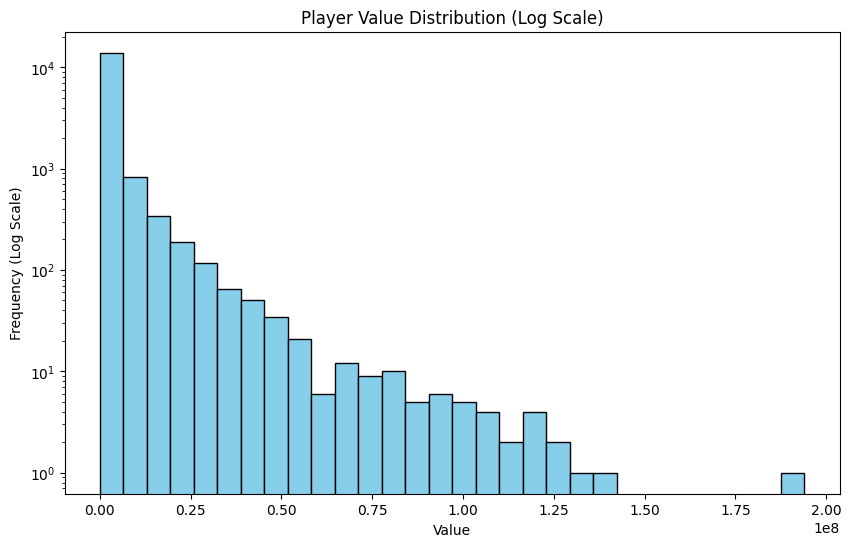

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(fifa['Value'], bins=30, color='skyblue', edgecolor='black', log=True)
plt.title('Player Value Distribution (Log Scale)')
plt.xlabel('Value')
plt.ylabel('Frequency (Log Scale)')
plt.show()


Wages range from values like "€250K" to "€500". Lets fix this too.

In [77]:
fifa.Wage

0        €250K
1        €140K
2        €135K
3        €350K
4         €45K
         ...  
16703     €650
16704     €950
16706     €550
16707     €700
16708     €500
Name: Wage, Length: 15591, dtype: object

In [78]:
test_fifa['Wage'] = test_fifa['Wage'].replace('[€,]', '', regex=True)
test_fifa['Wage'] = test_fifa['Wage'].replace('[Kk]', 'e+3', regex=True)
test_fifa['Wage'] = pd.to_numeric(test_fifa['Wage'], errors='coerce')

test_fifa.Wage = fifa.Wage
fifa.Wage

0        250000.0
1        140000.0
2        135000.0
3        350000.0
4         45000.0
           ...   
16703       650.0
16704       950.0
16706       550.0
16707       700.0
16708       500.0
Name: Wage, Length: 15591, dtype: float64

In [79]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15591 entries, 0 to 16708
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                15591 non-null  object 
 1   Age                 15591 non-null  int64  
 2   Nationality         15591 non-null  object 
 3   Overall             15591 non-null  int64  
 4   Potential           15591 non-null  int64  
 5   Club                15591 non-null  object 
 6   Value               15591 non-null  float64
 7   Wage                15591 non-null  float64
 8   Preferred Foot      15591 non-null  object 
 9   Weak Foot           15591 non-null  float64
 10  Skill Moves         15591 non-null  float64
 11  Position            15591 non-null  object 
 12  Height              15591 non-null  object 
 13  Weight              15591 non-null  object 
 14  Crossing            15591 non-null  float64
 15  Finishing           15591 non-null  float64
 16  HeadingAc

Remove html from the Position attribute

In [80]:

test_fifa['Position'] = test_fifa['Position'].str.split(">")
test_fifa['Position'] = test_fifa['Position'].apply(lambda x:x[1])


In [81]:
test_fifa['Position'].unique()

array(['CAM', 'LDM', 'RS', 'RCM', 'LB', 'RDM', 'LCM', 'SUB', 'LS', 'RM',
       'LCB', 'LM', 'RB', 'CDM', 'RW', 'LW', 'ST', 'CM', 'RF', 'LWB',
       'RAM', 'CF', 'RES', 'LF', 'RWB', 'CB', 'RCB', 'LAM', 'GK'],
      dtype=object)

Change positions to "Attacker", "Midfielder", "Defender" and "GK"

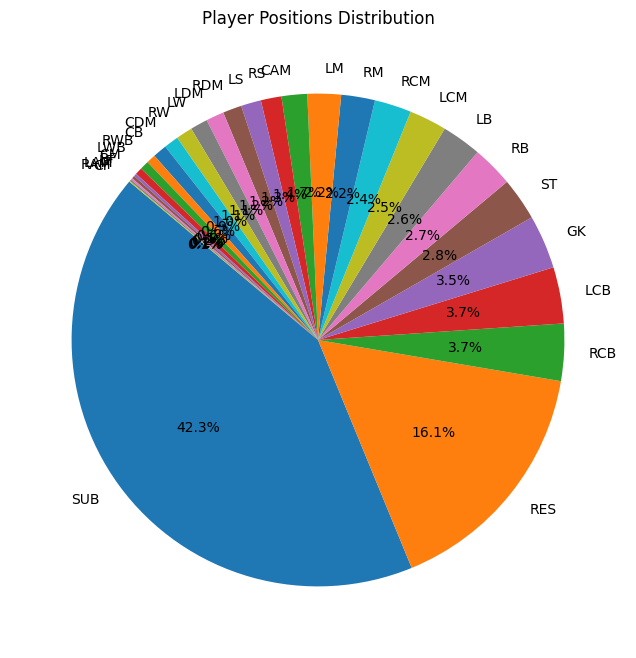

In [82]:
import matplotlib.pyplot as plt

position_counts = fifa['Position'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Player Positions Distribution')
plt.show()


In [83]:
import numpy as np

conditions = [
    test_fifa['Position'].isin(['CAM', 'LDM', 'CDM', 'RDM', 'LM', 'RM', 'LAM', 'RAM', 'LCM', 'RCM', 'CM']),
    test_fifa['Position'].isin(['LW', 'RW', 'LF', 'RF', 'ST', 'LS', 'RS', 'CF']),
    test_fifa['Position'].isin(['CB', 'LB', 'RB', 'LCB', 'RCB', 'LWB', 'RWB'])
]

choices = ['Midfielder', 'Forward', 'Defender']

test_fifa['New_Position'] = np.select(conditions, choices, default=test_fifa['Best Position'])

test_fifa['New_Position'].unique()

array(['Midfielder', 'Forward', 'Defender', 'CM', 'CDM', 'LB', 'CB', 'RB',
       'RM', 'RW', 'CAM', 'LWB', 'ST', 'LW', 'LM', 'RWB', 'CF', 'GK'],
      dtype=object)

In [84]:
position_counts = test_fifa['New_Position'].value_counts()

# Print out the counts
print(position_counts)

New_Position
Midfielder    2346
Defender      2317
CB            1585
ST            1519
GK            1442
CAM           1346
Forward       1268
RM             768
CDM            586
CM             485
RB             454
LM             440
LB             437
RW             184
LWB            142
RWB            142
LW              98
CF              32
Name: count, dtype: int64


In [85]:
conditions = [
    test_fifa['New_Position'].isin(['CAM', 'LDM', 'CDM', 'RDM', 'LM', 'RM', 'LAM', 'RAM', 'LCM', 'RCM', 'CM']),
    test_fifa['New_Position'].isin(['LW', 'RW', 'LF', 'RF', 'ST', 'LS', 'RS', 'CF']),
    test_fifa['New_Position'].isin(['CB', 'LB', 'RB', 'LCB', 'RCB', 'LWB', 'RWB'])
]

choices = ['Midfielder', 'Forward', 'Defender']

test_fifa['New_Position'] = np.select(conditions, choices, default=test_fifa['New_Position'])

test_fifa['New_Position'].unique()

test_fifa['New_Position'] = fifa['New_Position']

fifa['New_Position'].unique()

array(['Midfielder', 'Forward', 'Defender', 'GK'], dtype=object)

All positions are now classified as 'Midfielder', 'Forward', 'Defender', 'GK'

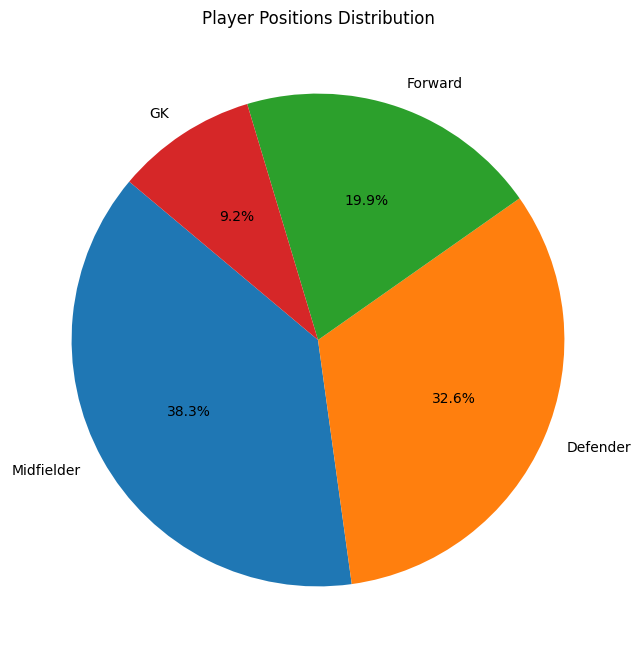

In [86]:
import matplotlib.pyplot as plt

position_counts = fifa['New_Position'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Player Positions Distribution')
plt.show()



Separate GK and Outfield players for future use

In [90]:

# GK specific attributes
gk_attributes = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

# Create a dataframe for GK players with GK specific attributes.
gkdata = test_fifa[test_fifa['Position'] == 'GK'][['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 
'Value', 'Wage', 'Preferred Foot', 'Height', 'Weight'] + gk_attributes]

# Create a test_fifaframe for non-GK players without GK specific attributes
nongkdata = test_fifa[test_fifa['Position'] != 'GK'].drop(gk_attributes, axis=1)

# Verify the separation
print("GK specific data:")
print(gkdata.head())

print("\nNon-GK data:")
print(nongkdata.head())

nongkdata.info()


GK specific data:
              Name  Age Nationality  Overall  Potential               Club  \
11192      Ederson   27      Brazil       89         91    Manchester City   
12350     M. Neuer   35     Germany       90         90  FC Bayern München   
13109  J. Pickford   27     England       83         85            Everton   
13177  21 A. Onana   24    Cameroon       84         88               Ajax   
13755   M. Maignan   25      France       84         89           AC Milan   

            Value      Wage Preferred Foot Height Weight  GKDiving  \
11192  94000000.0  200000.0           Left  188cm   86kg      87.0   
12350  13500000.0   86000.0          Right  193cm   93kg      88.0   
13109  33000000.0   83000.0           Left  185cm   77kg      83.0   
13177  48000000.0   18000.0          Right  190cm   93kg      84.0   
13755  49500000.0   45000.0          Right  191cm   89kg      83.0   

       GKHandling  GKKicking  GKPositioning  GKReflexes  
11192        82.0       93.0      

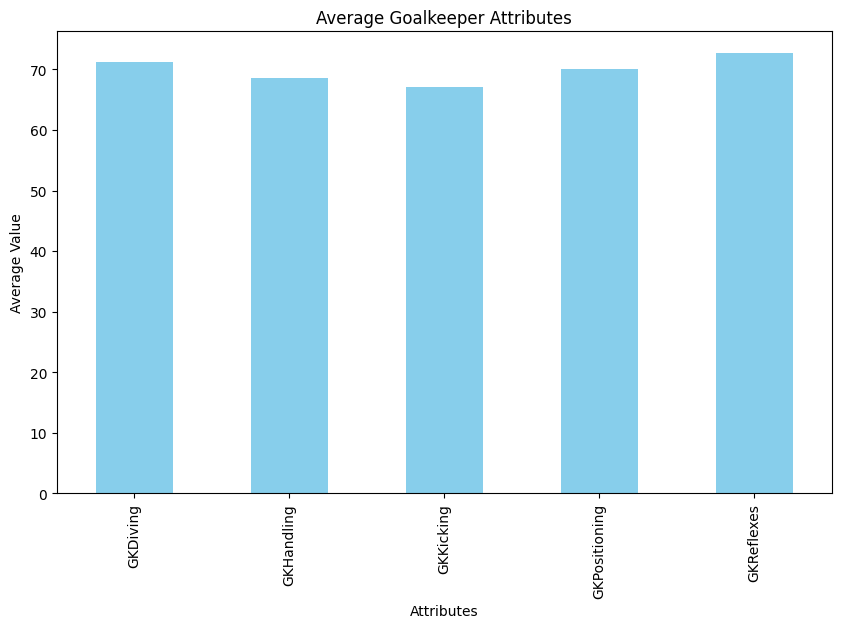

In [88]:
import matplotlib.pyplot as plt

# Assuming 'gkdata' is your DataFrame containing GK-specific attributes
gk_attributes = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

# Calculate the mean value for each attribute
attribute_means = gkdata[gk_attributes].mean()

# Plotting
plt.figure(figsize=(10, 6))
attribute_means.plot(kind='bar', color='skyblue')
plt.title('Average Goalkeeper Attributes')
plt.xlabel('Attributes')
plt.ylabel('Average Value')
plt.show()
